In [2]:
#Function that predicts the n-day stock return based on the given parameters
import pandas as pd
import numpy as np
stock_df = pd.read_csv('data/adjusted_stock_data.csv')
 
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [3]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Description', 'Symbol', 'Company Name',
       'Market capitalization as on March 28, 2024\n(In lakhs)'],
      dtype='object')

In [4]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Description,Symbol,Company Name,"Market capitalization as on March 28, 2024\n(In lakhs)"
0,2024-07-30,3034.05,3050.00,3020.00,3026.30,3026.30,4110291.0,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
1,2024-07-29,3023.90,3055.00,3023.55,3040.20,3040.20,3769275.0,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
2,2024-07-26,2984.80,3024.85,2980.70,3018.05,3018.05,4929970.0,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
3,2024-07-25,2962.00,3000.95,2954.15,2984.80,2984.80,6259938.0,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
4,2024-07-24,2970.00,3019.00,2952.80,2991.40,2991.40,5956681.0,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
...,...,...,...,...,...,...,...,...,...,...,...
6815036,2005-05-13,128.00,139.30,124.00,134.80,97.81,1128800.0,Allsec Technologies Limited provides business ...,ALLSEC,Allsec Technologies Limited,1.113312e+05
6815037,2005-05-12,123.25,129.80,122.40,126.20,91.57,347600.0,Allsec Technologies Limited provides business ...,ALLSEC,Allsec Technologies Limited,1.113312e+05
6815038,2005-05-11,129.70,131.50,118.00,121.85,88.41,352600.0,Allsec Technologies Limited provides business ...,ALLSEC,Allsec Technologies Limited,1.113312e+05
6815039,2005-05-10,126.70,135.60,125.15,130.15,94.43,1492300.0,Allsec Technologies Limited provides business ...,ALLSEC,Allsec Technologies Limited,1.113312e+05


In [5]:
stock_df.isna().sum()

Date                                                           0
Open                                                           0
High                                                           0
Low                                                            0
Close                                                          0
Adj Close                                                      0
Volume                                                    292717
Description                                                    0
Symbol                                                         0
Company Name                                                   0
Market capitalization as on March 28, 2024\n(In lakhs)    103692
dtype: int64

In [6]:
dividend_rows =  pd.read_csv('data/dividend_rows.csv')
dividend_rows['Date'] = pd.to_datetime(dividend_rows['Date'])
dividend_rows.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company Name_x,Ticker,Company Name_y,Description,Symbol,Company Name,"Market capitalization as on March 28, 2024\n(In lakhs)"
0,2023-08-21,9.00Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
1,2022-08-18,8.00Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
2,2021-06-11,7.00Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
3,2020-07-02,6.50Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
4,2019-08-02,6.44Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08


In [7]:
dividend_rows.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company Name_x', 'Ticker', 'Company Name_y', 'Description', 'Symbol',
       'Company Name',
       'Market capitalization as on March 28, 2024\n(In lakhs)'],
      dtype='object')

In [8]:
dividend_rows.isna().sum()

Date                                                          0
Open                                                          0
High                                                      21651
Low                                                       21651
Close                                                     21651
Adj Close                                                 21651
Volume                                                    21651
Company Name_x                                                0
Ticker                                                        0
Company Name_y                                                0
Description                                                   0
Symbol                                                        0
Company Name                                                  0
Market capitalization as on March 28, 2024\n(In lakhs)       79
dtype: int64

In [9]:
unique_tickers = dividend_rows['Ticker'].unique() 
unique_tickers

array(['RELIANCE', 'TCS', 'HDFCBANK', ..., 'VISASTEEL', 'GICHSGFIN',
       'ALLSEC'], dtype=object)

In [10]:
# Check if the symbols and dates match between datasets - company tickers
common_symbols = set(stock_df['Symbol']).intersection(set(dividend_rows['Symbol']))
print(f"Number of common symbols: {len(common_symbols)}")

Number of common symbols: 1536


In [11]:
analyst_ratings =  pd.read_csv('data/2000_analysts_og.csv')
analyst_ratings['date'] = pd.to_datetime(analyst_ratings['date'])
analyst_ratings.head()

C:\Users\disch\AppData\Local\Temp\ipykernel_5708\1269458253.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  analyst_ratings['date'] = pd.to_datetime(analyst_ratings['date'])


,Unnamed: 0,date,stock_name,author,ltp,target,price_at_reco,upside%,type,pdf_url
0,45319,2024-07-29,havells-india-ltd,Geojit BNP Paribas\nReco Target,1988.05,1644.0,1837.60\n(8.19%),17.31,Sell,https://trendlyne.com/get-document/report/pdf/...
1,45320,2024-07-21,havells-india-ltd,Anand Rathi\nTarget,1988.05,2146.0,1768.50\n(12.41%),7.94,Buy,https://trendlyne.com/get-document/report/pdf/...
2,45321,2024-07-19,havells-india-ltd,Keynote Capitals Ltd\nReco Target,1988.05,1720.0,1768.50\n(12.41%),Target met,Sell,https://trendlyne.com/get-document/report/pdf/...
3,45322,2024-07-19,havells-india-ltd,Prabhudas Lilladhar\nTarget,1988.05,1976.0,1768.50\n(12.41%),Target met,Accumulate,https://trendlyne.com/get-document/report/pdf/...
4,45323,2024-06-05,havells-india-ltd,BOB Capital Markets Ltd.,1988.05,1780.0,1792.80\n(10.89%),Target met,Hold,https://trendlyne.com/get-document/report/pdf/...


In [12]:
analyst_ratings.columns

Index(['Unnamed: 0', 'date', 'stock_name', 'author', 'ltp', 'target',
       'price_at_reco', 'upside%', 'type', 'pdf_url'],
      dtype='object')

In [13]:
analyst_ratings.isna().sum()

Unnamed: 0         0
date               0
stock_name         0
author             0
ltp                0
target            72
price_at_reco     16
upside%          219
type              13
pdf_url           34
dtype: int64

In [14]:
# Data Preprocessing
stock_df = stock_df.drop(['Volume', 'Market capitalization as on March 28, 2024\n(In lakhs)'], axis=1)

In [15]:
def clean_price_at_reco(price):
    percentage = None  # Initialize percentage as None

    # Check if the price is a string
    if isinstance(price, str):
        # Split the string by newline
        parts = price.split('\n')
        
        # Check if we have at least two parts
        if len(parts) >= 2:
            # Take the first part as price and second as percentage
            price = parts[0]
            percentage = parts[1]
            
        # Attempt to convert to numeric, ignoring any errors
        price = pd.to_numeric(price, errors='coerce')
    
    return price, percentage
    
# Apply the cleaning function to the 'price_at_reco' column and collect results
analyst_ratings[['cleaned_price_at_reco', 'percentage']] = analyst_ratings['price_at_reco'].apply(
    lambda x: pd.Series(clean_price_at_reco(x))
)

# Print the cleaned DataFrame
analyst_ratings[['price_at_reco', 'cleaned_price_at_reco', 'percentage']]

,price_at_reco,cleaned_price_at_reco,percentage
0,1837.60\n(8.19%),1837.60,(8.19%)
1,1768.50\n(12.41%),1768.50,(12.41%)
2,1768.50\n(12.41%),1768.50,(12.41%)
3,1768.50\n(12.41%),1768.50,(12.41%)
4,1792.80\n(10.89%),1792.80,(10.89%)
...,...,...,...
753,349.00\n(-47.07%),349.00,(-47.07%)
754,261.95\n(-29.48%),261.95,(-29.48%)
755,120.15\n(53.76%),120.15,(53.76%)
756,108.80\n(69.80%),108.80,(69.80%)


In [16]:
analyst_ratings

,Unnamed: 0,date,stock_name,author,ltp,target,price_at_reco,upside%,type,pdf_url,cleaned_price_at_reco,percentage
0,45319,2024-07-29,havells-india-ltd,Geojit BNP Paribas\nReco Target,1988.05,1644.0,1837.60\n(8.19%),17.31,Sell,https://trendlyne.com/get-document/report/pdf/...,1837.60,(8.19%)
1,45320,2024-07-21,havells-india-ltd,Anand Rathi\nTarget,1988.05,2146.0,1768.50\n(12.41%),7.94,Buy,https://trendlyne.com/get-document/report/pdf/...,1768.50,(12.41%)
2,45321,2024-07-19,havells-india-ltd,Keynote Capitals Ltd\nReco Target,1988.05,1720.0,1768.50\n(12.41%),Target met,Sell,https://trendlyne.com/get-document/report/pdf/...,1768.50,(12.41%)
3,45322,2024-07-19,havells-india-ltd,Prabhudas Lilladhar\nTarget,1988.05,1976.0,1768.50\n(12.41%),Target met,Accumulate,https://trendlyne.com/get-document/report/pdf/...,1768.50,(12.41%)
4,45323,2024-06-05,havells-india-ltd,BOB Capital Markets Ltd.,1988.05,1780.0,1792.80\n(10.89%),Target met,Hold,https://trendlyne.com/get-document/report/pdf/...,1792.80,(10.89%)
...,...,...,...,...,...,...,...,...,...,...,...,...
753,46072,2017-11-08,rain-industries-ltd,AUM Capital,184.74,410.0,349.00\n(-47.07%),Target met,Buy,https://trendlyne.com/get-document/report/pdf/...,349.00,(-47.07%)
754,46073,2017-11-01,rain-industries-ltd,Motilal Oswal,184.74,362.0,261.95\n(-29.48%),Target met,Buy,https://trendlyne.com/get-document/report/pdf/...,261.95,(-29.48%)
755,46074,2017-08-14,rain-industries-ltd,IDBI Capital\nTarget,184.74,144.0,120.15\n(53.76%),Target met,Buy,https://trendlyne.com/get-document/report/pdf/...,120.15,(53.76%)
756,46075,2017-05-08,rain-industries-ltd,IDBI Capital\nTarget,184.74,139.0,108.80\n(69.80%),Target met,Buy,https://trendlyne.com/get-document/report/pdf/...,108.80,(69.80%)


# Output Variable 1

In [17]:
# Clean 'price_at_reco' and 'target' to extract numeric values
analyst_ratings['cleaned_price_at_reco'] = analyst_ratings['cleaned_price_at_reco'].astype(float)
analyst_ratings['target'] = analyst_ratings['target'].astype(float)

# Calculate expected return
analyst_ratings['expected_return'] = ((analyst_ratings['target'] - analyst_ratings['cleaned_price_at_reco']) / analyst_ratings['cleaned_price_at_reco']) * 100

In [18]:
#difference between target and price at recommendation - which defines upside% whether target was met or not
analyst_ratings[['target','cleaned_price_at_reco']]

,target,cleaned_price_at_reco
0,1644.0,1837.60
1,2146.0,1768.50
2,1720.0,1768.50
3,1976.0,1768.50
4,1780.0,1792.80
...,...,...
753,410.0,349.00
754,362.0,261.95
755,144.0,120.15
756,139.0,108.80


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from tqdm import tqdm

# Filter the DataFrame for the date range
df_2019 = stock_df[(stock_df['Date'] >= '1900-01-01') & (stock_df['Date'] <= '2024-12-31')]

# Prepare company names for TF-IDF matching
company_names = [x.lower() for x in stock_df['Company Name'].unique().tolist()]
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 4), max_features=5000)  # Character-based TF-IDF
tfidf_matrix = vectorizer.fit_transform(company_names)

print("Matrix shape", tfidf_matrix.shape)

# Function to get the best match using cosine similarity
def get_closest_company_name(input_name, company_names, tfidf_matrix, vectorizer):
    input_tfidf = vectorizer.transform([input_name.lower()])
    cosine_similarities = cosine_similarity(input_tfidf, tfidf_matrix).flatten()
    best_match_idx = cosine_similarities.argmax()
    best_match_score = cosine_similarities[best_match_idx]
    return company_names[best_match_idx] if best_match_score > 0.5 else None  # Threshold of 0.5 for similarity

# Apply TF-IDF matching with tqdm for progress visualization
tqdm.pandas()  # Initialize tqdm with pandas
analyst_ratings['matched_company_name'] = analyst_ratings['stock_name'].progress_apply(
    lambda x: get_closest_company_name(x, company_names, tfidf_matrix, vectorizer)
)

# Create a mapping of matched company names to symbols
symbol_map = stock_df[['Company Name', 'Symbol']].drop_duplicates()
symbol_map['Company Name'] = symbol_map['Company Name'].str.lower()
analyst_ratings = pd.merge(analyst_ratings, symbol_map, left_on='matched_company_name', right_on='Company Name', how='left')

Matrix shape (1973, 5000)


100%|███████████████████████████████████████████████████████████████████████████████| 758/758 [00:04<00:00, 160.09it/s]


In [20]:
print(analyst_ratings)

     Unnamed: 0       date           stock_name  \
0         45319 2024-07-29    havells-india-ltd   
1         45320 2024-07-21    havells-india-ltd   
2         45321 2024-07-19    havells-india-ltd   
3         45322 2024-07-19    havells-india-ltd   
4         45323 2024-06-05    havells-india-ltd   
..          ...        ...                  ...   
753       46072 2017-11-08  rain-industries-ltd   
754       46073 2017-11-01  rain-industries-ltd   
755       46074 2017-08-14  rain-industries-ltd   
756       46075 2017-05-08  rain-industries-ltd   
757       46076 2017-02-27  rain-industries-ltd   

                                  author      ltp  target      price_at_reco  \
0      Geojit BNP Paribas\nReco   Target  1988.05  1644.0   1837.60\n(8.19%)   
1                    Anand Rathi\nTarget  1988.05  2146.0  1768.50\n(12.41%)   
2    Keynote Capitals Ltd\nReco   Target  1988.05  1720.0  1768.50\n(12.41%)   
3            Prabhudas Lilladhar\nTarget  1988.05  1976.0  1768.50\

In [21]:
import sys
import os

# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Append the directory of script
sys.path.append(os.path.join(current_dir, 'Project-1'))

# call predict_n_day_return function
from nday_stockprediction import predict_n_day_return

In [22]:
# Example usage - test individual tickers
result = predict_n_day_return(ticker='HDFCBANK', date_d='2024-05-30', n=5, stock_df=stock_df, dividend_df=dividend_rows)
print(result)

(1519.0, 1559.7, 0.026793943383805165, Timestamp('2024-05-31 00:00:00'), Timestamp('2024-06-06 00:00:00'), 'Data not available for 2024-06-05 00:00:00. Nearest available date is 2024-06-06.\n')


In [23]:
hdfc_analyst_row = analyst_ratings[(analyst_ratings['Symbol'] == 'HDFCBANK') & 
                                   (analyst_ratings['date'] == '2024-05-30')]

if hdfc_analyst_row.empty:
    print("No analyst rating found for HDFCBANK on 2024-05-30.")
else:
    # Extract the expected return
    expected_return_hdfc = hdfc_analyst_row['expected_return'].values[0]
    # Compare with the predicted return
    predicted_return = predict_n_day_return(ticker='HDFCBANK', date_d='2024-05-30', n=5, stock_df=stock_df, dividend_df=dividend_rows)
    print(f"Expected Return (from analyst ratings): {expected_return_hdfc}%")
    print(f"Predicted Return (from model): {predicted_return}%")

No analyst rating found for HDFCBANK on 2024-05-30.


In [24]:
# Function to get the nearest available date in stock data if the exact date is missing
def get_nearest_date(stock_data, reference_date):
    stock_data = stock_data.copy()
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])  
    reference_date = pd.to_datetime(reference_date)
    
    if reference_date in stock_data['Date'].values:
        return reference_date  # Exact match found
    else:
        # Find the nearest available date
        closest_date = stock_data.loc[stock_data['Date'].sub(reference_date).abs().idxmin(), 'Date']
        return closest_date

# Loop through each row of the analyst ratings with a progress bar
for index, row in tqdm(analyst_ratings.iterrows(), total=analyst_ratings.shape[0], desc="Processing"):
    matched_company = row['matched_company_name']  # Refer to the matched company name in the dataframe
    
    if matched_company:
        # Get the ticker corresponding to the matched company name
        matched_ticker = stock_df[stock_df['Company Name'].str.lower() == matched_company]['Symbol'].iloc[0]
    else:
        matched_ticker = None  # No matching company found
    
    n_days = 5  # Set the number of days for predicting return
    
    # Only call the function if a ticker was found
    if matched_ticker:
        try:
            # Get stock data for the matched ticker
            stock_data = stock_df.loc[stock_df['Symbol'] == matched_ticker].copy()  # Use .copy() to avoid warnings
            
            # Get the nearest available date if the reference date is not found
            nearest_date = get_nearest_date(stock_data, row['date'])
            
            # Call the prediction function with the nearest available date
            _, _, total_return, _, _, _ = predict_n_day_return(matched_ticker, nearest_date, n_days, stock_df, dividend_rows)
            analyst_ratings.loc[index, 'actual_return'] = total_return  # Use .loc to set the value
        
        except Exception as e:
            analyst_ratings.loc[index, 'actual_return'] = None  # Store None if there's an error
            tqdm.write(f"Error for {matched_ticker} on {row['date']}: {e}")
    else:
        analyst_ratings.loc[index, 'actual_return'] = None  # No ticker found, store None
    
    # Print a warning if the nearest date is not the same as the reference date
    if nearest_date != row['date']:
        tqdm.write(f"Reference date {row['date']} not found. Using nearest date: {nearest_date}")

Processing:   0%|▏                                                                     | 2/758 [00:08<50:54,  4.04s/it]

Reference date 2024-07-21 00:00:00 not found. Using nearest date: 2024-07-22 00:00:00


Processing:   1%|█                                                                    | 11/758 [00:44<51:32,  4.14s/it]

Reference date 2024-05-01 00:00:00 not found. Using nearest date: 2024-05-02 00:00:00


Processing:   2%|█                                                                    | 12/758 [00:48<52:21,  4.21s/it]

Reference date 2024-05-01 00:00:00 not found. Using nearest date: 2024-05-02 00:00:00


Processing:   7%|████▉                                                                | 54/758 [03:32<45:03,  3.84s/it]

Reference date 2022-05-07 00:00:00 not found. Using nearest date: 2022-05-06 00:00:00


Processing:   7%|█████                                                                | 55/758 [03:36<44:53,  3.83s/it]

Reference date 2022-05-07 00:00:00 not found. Using nearest date: 2022-05-06 00:00:00


Processing:   7%|█████                                                                | 56/758 [03:40<44:45,  3.83s/it]

Reference date 2022-05-07 00:00:00 not found. Using nearest date: 2022-05-06 00:00:00


Processing:   8%|█████▌                                                               | 61/758 [03:59<44:28,  3.83s/it]

Reference date 2022-01-23 00:00:00 not found. Using nearest date: 2022-01-24 00:00:00


Processing:   8%|█████▋                                                               | 62/758 [04:03<44:36,  3.85s/it]

Reference date 2022-01-22 00:00:00 not found. Using nearest date: 2022-01-21 00:00:00


Processing:   9%|██████▌                                                              | 72/758 [04:41<44:01,  3.85s/it]

Reference date 2021-05-22 00:00:00 not found. Using nearest date: 2021-05-21 00:00:00


Processing:  10%|██████▋                                                              | 73/758 [04:45<43:49,  3.84s/it]

Reference date 2021-05-22 00:00:00 not found. Using nearest date: 2021-05-21 00:00:00


Processing:  18%|████████████▎                                                       | 137/758 [08:52<39:22,  3.80s/it]

Reference date 2018-10-18 00:00:00 not found. Using nearest date: 2018-10-19 00:00:00


Processing:  19%|█████████████                                                       | 146/758 [09:26<38:50,  3.81s/it]

Reference date 2018-07-21 00:00:00 not found. Using nearest date: 2018-07-20 00:00:00


Processing:  21%|█████████████▉                                                      | 156/758 [10:05<38:38,  3.85s/it]

Reference date 2018-05-12 00:00:00 not found. Using nearest date: 2018-05-11 00:00:00


Processing:  26%|█████████████████▍                                                  | 194/758 [12:32<35:44,  3.80s/it]

Reference date 2016-07-24 00:00:00 not found. Using nearest date: 2016-07-25 00:00:00


Processing:  29%|████████████████████                                                | 223/758 [14:22<33:45,  3.79s/it]

Error for HONAUT on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  30%|████████████████████▋                                               | 230/758 [14:48<33:05,  3.76s/it]

Error for VSSL on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  31%|█████████████████████                                               | 235/758 [15:07<32:43,  3.75s/it]

Reference date 2022-05-03 00:00:00 not found. Using nearest date: 2022-05-04 00:00:00


Processing:  32%|█████████████████████▌                                              | 240/758 [15:26<32:26,  3.76s/it]

Reference date 2021-05-16 00:00:00 not found. Using nearest date: 2021-05-17 00:00:00


Processing:  33%|██████████████████████▎                                             | 249/758 [16:00<32:11,  3.79s/it]

Error for JTEKTINDIA on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  33%|██████████████████████▌                                             | 251/758 [16:07<31:48,  3.76s/it]

Error for PREMIER on 2024-08-26 00:00:00: Insufficient data to determine d+1.
Reference date 2024-08-26 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  33%|██████████████████████▌                                             | 252/758 [16:11<31:40,  3.76s/it]

Error for POLYMED on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  34%|██████████████████████▉                                             | 256/758 [16:26<31:42,  3.79s/it]

Reference date 2022-11-08 00:00:00 not found. Using nearest date: 2022-11-09 00:00:00


Processing:  35%|███████████████████████▌                                            | 263/758 [16:53<31:09,  3.78s/it]

Error for PENIND on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  35%|████████████████████████                                            | 268/758 [17:11<30:47,  3.77s/it]

Error for JINDALSTEL on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  36%|████████████████████████▊                                           | 276/758 [17:42<30:34,  3.81s/it]

Reference date 2024-02-03 00:00:00 not found. Using nearest date: 2024-02-02 00:00:00


Processing:  37%|█████████████████████████                                           | 280/758 [17:57<30:52,  3.88s/it]

Reference date 2023-08-13 00:00:00 not found. Using nearest date: 2023-08-14 00:00:00


Processing:  38%|█████████████████████████▉                                          | 289/758 [18:32<29:48,  3.81s/it]

Reference date 2022-07-16 00:00:00 not found. Using nearest date: 2022-07-15 00:00:00


Processing:  42%|████████████████████████████▊                                       | 321/758 [20:37<27:52,  3.83s/it]

Reference date 2019-08-18 00:00:00 not found. Using nearest date: 2019-08-19 00:00:00


Processing:  43%|█████████████████████████████▏                                      | 325/758 [20:52<27:26,  3.80s/it]

Reference date 2019-02-02 00:00:00 not found. Using nearest date: 2019-02-01 00:00:00


Processing:  45%|██████████████████████████████▍                                     | 339/758 [21:46<26:29,  3.79s/it]

Reference date 2016-09-10 00:00:00 not found. Using nearest date: 2016-09-09 00:00:00


Processing:  45%|██████████████████████████████▋                                     | 342/758 [21:57<26:15,  3.79s/it]

Error for ACLGATI on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-23 00:00:00


Processing:  45%|██████████████████████████████▊                                     | 343/758 [22:01<26:05,  3.77s/it]

Error for ACLGATI on 2024-08-07 00:00:00: Insufficient data to determine d+1.
Reference date 2024-08-07 00:00:00 not found. Using nearest date: 2024-07-23 00:00:00


Processing:  49%|█████████████████████████████████                                   | 369/758 [23:38<24:19,  3.75s/it]

Error for ROSSARI on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  49%|█████████████████████████████████▍                                  | 373/758 [23:54<24:07,  3.76s/it]

Reference date 2024-05-01 00:00:00 not found. Using nearest date: 2024-05-02 00:00:00


Processing:  50%|█████████████████████████████████▊                                  | 377/758 [24:09<24:10,  3.81s/it]

Reference date 2023-10-24 00:00:00 not found. Using nearest date: 2023-10-25 00:00:00


Processing:  50%|█████████████████████████████████▉                                  | 378/758 [24:12<23:58,  3.78s/it]

Reference date 2023-10-24 00:00:00 not found. Using nearest date: 2023-10-25 00:00:00


Processing:  52%|███████████████████████████████████▌                                | 397/758 [25:24<22:52,  3.80s/it]

Reference date 2020-11-16 00:00:00 not found. Using nearest date: 2020-11-17 00:00:00


Processing:  53%|███████████████████████████████████▊                                | 399/758 [25:32<22:42,  3.80s/it]

Reference date 2020-07-13 00:00:00 not found. Using nearest date: 2020-07-23 00:00:00


Processing:  53%|███████████████████████████████████▉                                | 400/758 [25:36<22:57,  3.85s/it]

Reference date 2020-07-13 00:00:00 not found. Using nearest date: 2020-07-23 00:00:00


Processing:  53%|███████████████████████████████████▉                                | 401/758 [25:40<22:43,  3.82s/it]

Reference date 2020-07-11 00:00:00 not found. Using nearest date: 2020-07-23 00:00:00


Processing:  53%|████████████████████████████████████                                | 402/758 [25:43<22:29,  3.79s/it]

Error for DHANUKA on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  53%|████████████████████████████████████▏                               | 403/758 [25:47<22:18,  3.77s/it]

Error for DHANUKA on 2024-08-05 00:00:00: Insufficient data to determine d+1.
Reference date 2024-08-05 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  55%|█████████████████████████████████████▋                              | 420/758 [26:52<21:48,  3.87s/it]

Reference date 2021-07-31 00:00:00 not found. Using nearest date: 2021-07-30 00:00:00


Processing:  57%|██████████████████████████████████████▊                             | 432/758 [27:37<20:26,  3.76s/it]

Reference date 2020-05-17 00:00:00 not found. Using nearest date: 2020-05-18 00:00:00


Processing:  58%|███████████████████████████████████████▎                            | 438/758 [28:00<20:13,  3.79s/it]

Reference date 2019-02-13 00:00:00 not found. Using nearest date: 2019-02-14 00:00:00


Processing:  60%|█████████████████████████████████████████                           | 458/758 [29:15<18:40,  3.74s/it]

Error for LTIM on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  61%|█████████████████████████████████████████▏                          | 459/758 [29:19<18:48,  3.77s/it]

Error for LTIM on 2024-07-31 00:00:00: Insufficient data to determine d+1.
Reference date 2024-07-31 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  65%|████████████████████████████████████████████▍                       | 496/758 [31:37<16:25,  3.76s/it]

Reference date 2023-02-25 00:00:00 not found. Using nearest date: 2023-02-24 00:00:00


Processing:  66%|████████████████████████████████████████████▊                       | 499/758 [31:49<16:29,  3.82s/it]

Reference date 2023-01-22 00:00:00 not found. Using nearest date: 2023-01-23 00:00:00


Processing:  66%|█████████████████████████████████████████████                       | 503/758 [32:04<16:04,  3.78s/it]

Reference date 2022-10-16 00:00:00 not found. Using nearest date: 2022-10-17 00:00:00


Processing:  66%|█████████████████████████████████████████████▏                      | 504/758 [32:08<16:04,  3.80s/it]

Reference date 2022-10-16 00:00:00 not found. Using nearest date: 2022-10-17 00:00:00


Processing:  67%|█████████████████████████████████████████████▎                      | 505/758 [32:12<15:57,  3.78s/it]

Reference date 2022-07-16 00:00:00 not found. Using nearest date: 2022-07-15 00:00:00


Processing:  70%|███████████████████████████████████████████████▎                    | 528/758 [33:38<14:25,  3.76s/it]

Reference date 2021-07-17 00:00:00 not found. Using nearest date: 2021-07-16 00:00:00


Processing:  70%|███████████████████████████████████████████████▍                    | 529/758 [33:42<14:26,  3.78s/it]

Reference date 2021-07-17 00:00:00 not found. Using nearest date: 2021-07-16 00:00:00


Processing:  76%|███████████████████████████████████████████████████▍                | 573/758 [36:28<11:44,  3.81s/it]

Reference date 2019-10-19 00:00:00 not found. Using nearest date: 2019-10-18 00:00:00


Processing:  76%|███████████████████████████████████████████████████▌                | 575/758 [36:36<11:37,  3.81s/it]

Reference date 2019-07-20 00:00:00 not found. Using nearest date: 2019-07-19 00:00:00


Processing:  76%|███████████████████████████████████████████████████▋                | 576/758 [36:40<11:30,  3.79s/it]

Reference date 2019-07-20 00:00:00 not found. Using nearest date: 2019-07-19 00:00:00


Processing:  77%|████████████████████████████████████████████████████                | 580/758 [36:55<11:12,  3.78s/it]

Reference date 2019-05-05 00:00:00 not found. Using nearest date: 2019-05-06 00:00:00


Processing:  77%|████████████████████████████████████████████████████▋               | 587/758 [37:21<10:44,  3.77s/it]

Reference date 2019-01-19 00:00:00 not found. Using nearest date: 2019-01-18 00:00:00


Processing:  79%|█████████████████████████████████████████████████████▊              | 600/758 [38:10<09:54,  3.76s/it]

Reference date 2018-01-26 00:00:00 not found. Using nearest date: 2018-01-25 00:00:00


Processing:  80%|██████████████████████████████████████████████████████▋             | 610/758 [38:48<09:14,  3.75s/it]

Reference date 2016-07-11 00:00:00 not found. Using nearest date: 2016-07-21 00:00:00


Processing:  81%|██████████████████████████████████████████████████████▊             | 611/758 [38:52<09:14,  3.77s/it]

Reference date 2016-07-09 00:00:00 not found. Using nearest date: 2016-07-21 00:00:00


Processing:  81%|██████████████████████████████████████████████████████▉             | 612/758 [38:55<09:09,  3.76s/it]

Reference date 2016-07-08 00:00:00 not found. Using nearest date: 2016-07-21 00:00:00


Processing:  81%|██████████████████████████████████████████████████████▉             | 613/758 [38:59<09:05,  3.76s/it]

Reference date 2016-07-08 00:00:00 not found. Using nearest date: 2016-07-21 00:00:00


Processing:  81%|███████████████████████████████████████████████████████             | 614/758 [39:03<09:00,  3.75s/it]

Reference date 2016-07-05 00:00:00 not found. Using nearest date: 2016-07-21 00:00:00
Reference date 2018-06-23 00:00:00 not found. Using nearest date: 2016-07-21 00:00:00


Processing:  82%|███████████████████████████████████████████████████████▊            | 622/758 [39:29<08:15,  3.65s/it]

Error for RVNL on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  83%|████████████████████████████████████████████████████████▎           | 628/758 [39:52<08:08,  3.76s/it]

Error for BOROLTD on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  85%|██████████████████████████████████████████████████████████▏         | 648/758 [40:22<01:08,  1.61it/s]

Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2023-11-15 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2023-02-14 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2022-08-13 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2022-05-31 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2022-01-28 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2021-11-08 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2021-09-29 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2021-08-16 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2021-02-16 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2020-12-17 00:00:00 not found. Using nearest date: 2021-08-03 00:00:00
Reference date 2018-05-31 00:00:00 not found. Using ne

Processing:  87%|███████████████████████████████████████████████████████████         | 659/758 [40:30<00:47,  2.10it/s]

Error for GOCOLORS on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  87%|███████████████████████████████████████████████████████████▍        | 663/758 [40:45<01:57,  1.23s/it]

Reference date 2024-05-04 00:00:00 not found. Using nearest date: 2024-05-03 00:00:00


Processing:  88%|███████████████████████████████████████████████████████████▋        | 665/758 [40:53<02:36,  1.68s/it]

Reference date 2023-05-06 00:00:00 not found. Using nearest date: 2023-05-05 00:00:00


Processing:  89%|████████████████████████████████████████████████████████████▏       | 671/758 [41:11<04:17,  2.96s/it]

Reference date 2021-11-16 00:00:00 not found. Using nearest date: 2021-11-30 00:00:00


Processing:  89%|████████████████████████████████████████████████████████████▎       | 672/758 [41:15<04:34,  3.20s/it]

Reference date 2021-11-16 00:00:00 not found. Using nearest date: 2021-11-30 00:00:00


Processing:  89%|████████████████████████████████████████████████████████████▎       | 673/758 [41:19<04:44,  3.35s/it]

Reference date 2021-11-16 00:00:00 not found. Using nearest date: 2021-11-30 00:00:00


Processing:  89%|████████████████████████████████████████████████████████████▍       | 674/758 [41:23<04:52,  3.48s/it]

Reference date 2021-11-16 00:00:00 not found. Using nearest date: 2021-11-30 00:00:00


Processing:  89%|████████████████████████████████████████████████████████████▌       | 675/758 [41:27<04:54,  3.55s/it]

Error for CAMLINFINE on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-23 00:00:00


Processing:  89%|████████████████████████████████████████████████████████████▋       | 676/758 [41:31<04:56,  3.61s/it]

Error for CAMLINFINE on 2024-08-13 00:00:00: Insufficient data to determine d+1.
Reference date 2024-08-13 00:00:00 not found. Using nearest date: 2024-07-23 00:00:00


Processing:  91%|█████████████████████████████████████████████████████████████▉      | 690/758 [42:24<04:17,  3.78s/it]

Reference date 2018-02-17 00:00:00 not found. Using nearest date: 2018-02-16 00:00:00


Processing:  92%|██████████████████████████████████████████████████████████████▎     | 695/758 [42:43<03:57,  3.77s/it]

Error for PGEL on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  92%|██████████████████████████████████████████████████████████████▌     | 698/758 [42:59<04:56,  4.94s/it]

Error for NRBBEARING on 2024-09-14 00:00:00: Insufficient data to determine d+1.
Reference date 2024-09-14 00:00:00 not found. Using nearest date: 2024-07-30 00:00:00


Processing:  94%|███████████████████████████████████████████████████████████████▌    | 709/758 [43:45<03:36,  4.42s/it]

Reference date 2019-02-13 00:00:00 not found. Using nearest date: 2019-02-14 00:00:00


Processing:  94%|████████████████████████████████████████████████████████████████    | 714/758 [44:08<03:08,  4.28s/it]

Reference date 2018-11-03 00:00:00 not found. Using nearest date: 2018-11-02 00:00:00


Processing: 100%|████████████████████████████████████████████████████████████████████| 758/758 [46:56<00:00,  3.72s/it]


In [50]:
# Calculate correlation
correlation = analyst_ratings[['expected_return', 'actual_return']].corr().iloc[0, 1]
print(f"Correlation between expected returns and actual returns: {correlation}")

Correlation between expected returns and actual returns: -0.033764418575036356


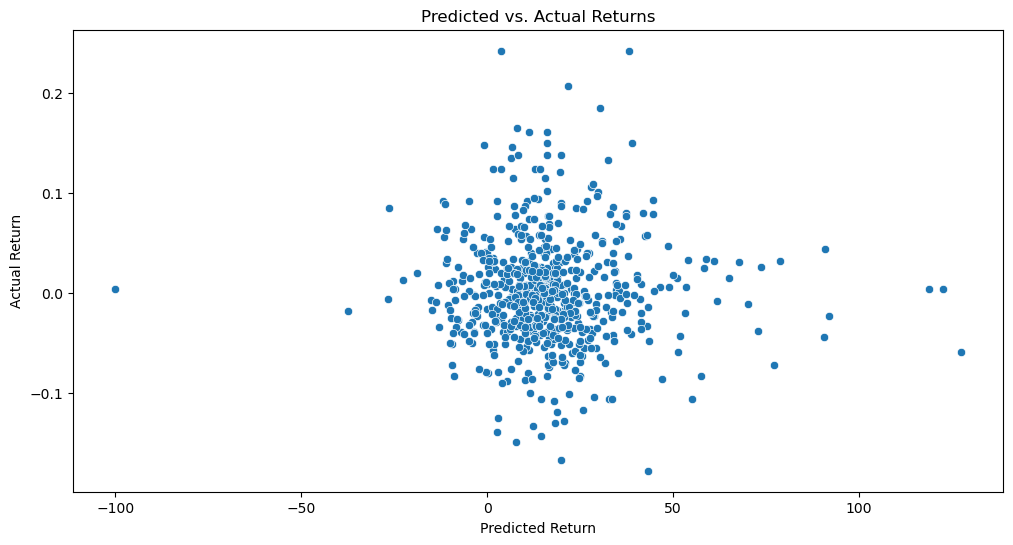

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=analyst_ratings, x='expected_return', y='actual_return')
plt.title('Predicted vs. Actual Returns')
plt.xlabel('Predicted Return')
plt.ylabel('Actual Return')
plt.show()


In [27]:
# Save the DataFrame to a CSV file
output_file = 'data/updated_analyst_ratings.csv'
analyst_ratings.to_csv(output_file, index=False)  # index=False to avoid writing row numbers

print(f"DataFrame saved to {output_file}")

DataFrame saved to data/updated_analyst_ratings.csv


In [49]:
print(analyst_ratings.columns)

Index(['Unnamed: 0', 'date', 'stock_name', 'author', 'ltp', 'target',
       'price_at_reco', 'upside%', 'type', 'pdf_url', 'cleaned_price_at_reco',
       'percentage', 'expected_return', 'matched_company_name', 'Company Name',
       'Symbol', 'actual_return', 'year', 'Sector_x', 'Sector_y'],
      dtype='object')


In [28]:
# Groupby companies/sectors
# Group by unique combinations of the specified columns and count the occurrences of each unique combination
grouped_analyst_ratings = analyst_ratings.groupby(
    ['stock_name', 'matched_company_name', 'Company Name', 'Symbol']
).size().reset_index(name='count')

grouped_analyst_ratings

,stock_name,matched_company_name,Company Name,Symbol,count
0,allcargo-gati-ltd,allcargo gati limited,allcargo gati limited,ACLGATI,27
1,aurionpro-solutions-ltd,aurionpro solutions limited,aurionpro solutions limited,AURIONPRO,2
2,borosil-ltd,borosil limited,borosil limited,BOROLTD,9
3,camlin-fine-sciences-ltd,camlin fine sciences limited,camlin fine sciences limited,CAMLINFINE,20
4,dhanuka-agritech-ltd,dhanuka agritech limited,dhanuka agritech limited,DHANUKA,56
5,go-fashion-india-ltd,go fashion (india) limited,go fashion (india) limited,GOCOLORS,15
6,goldiam-international-ltd,goldiam international limited,goldiam international limited,GOLDIAM,1
7,havells-india-ltd,havells india limited,havells india limited,HAVELLS,215
8,honeywell-automation-india-ltd,honeywell automation india limited,honeywell automation india limited,HONAUT,7
9,jindal-steel-power-ltd,jindal steel & power limited,jindal steel & power limited,JINDALSTEL,74


In [29]:
# Groupby Timelines
import pandas as pd

# Step 1: Extract the year from the 'date' column
analyst_ratings['year'] = pd.to_datetime(analyst_ratings['date']).dt.year

# Step 2: Calculate the correlation between actual and expected return grouped by year
# Ensure you have an 'actual_return' column calculated in your DataFrame
correlation_by_year = analyst_ratings.groupby('year').apply(
    lambda group: group[['expected_return', 'actual_return']].corr().iloc[0, 1]
)

# Print the correlation results for each year
print("Correlation between expected and actual returns by year:")
print(correlation_by_year)

Correlation between expected and actual returns by year:
year
2013         NaN
2014         NaN
2015    0.034897
2016   -0.044052
2017    0.285551
2018   -0.204528
2019   -0.088272
2020    0.070569
2021    0.027652
2022   -0.074631
2023    0.221254
2024   -0.208925
dtype: float64


C:\Users\disch\AppData\Local\Temp\ipykernel_5708\1156450653.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year = analyst_ratings.groupby('year').apply(


In [51]:
import pandas as pd

# Step 1: Extract the year from the 'date' column
analyst_ratings['year'] = pd.to_datetime(analyst_ratings['date']).dt.year

# Step 2: Calculate the correlation between actual and expected returns grouped by year and ticker
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by 'year' and 'Symbol' (ticker) and calculate correlation
correlation_by_year_and_ticker = analyst_ratings.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')

# Step 3: Map the expected and actual returns for each ticker in each year
mapped_returns = analyst_ratings.groupby(['year', 'Symbol'])[['expected_return', 'actual_return']].mean().reset_index()

# Merge the correlation and return mappings
merged_results = pd.merge(correlation_by_year_and_ticker, mapped_returns, on=['year', 'Symbol'])

# Print the results
print("Correlation, expected and actual returns by year and ticker:")
print(merged_results)


C:\Users\disch\AppData\Local\Temp\ipykernel_5708\3405270159.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year_and_ticker = analyst_ratings.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')


Correlation, expected and actual returns by year and ticker:
     year     Symbol  correlation  expected_return  actual_return
0    2013    HAVELLS          NaN              NaN       0.005070
1    2014    HAVELLS          NaN         7.591378       0.043472
2    2015    ACLGATI          NaN        58.144176       0.025457
3    2015  AURIONPRO          NaN        72.884440      -0.037464
4    2015    DHANUKA       1.0000        10.037672      -0.072519
..    ...        ...          ...              ...            ...
112  2024    PREMIER          NaN              NaN            NaN
113  2024   RELIGARE          NaN       127.301859      -0.058444
114  2024    ROSSARI       0.0868        20.428919       0.009161
115  2024       RVNL       1.0000        -1.662380       0.127137
116  2024       VSSL          NaN              NaN            NaN

[117 rows x 5 columns]


C:\Users\disch\AppData\Local\Temp\ipykernel_5708\1283690732.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year_and_ticker = analyst_ratings.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')


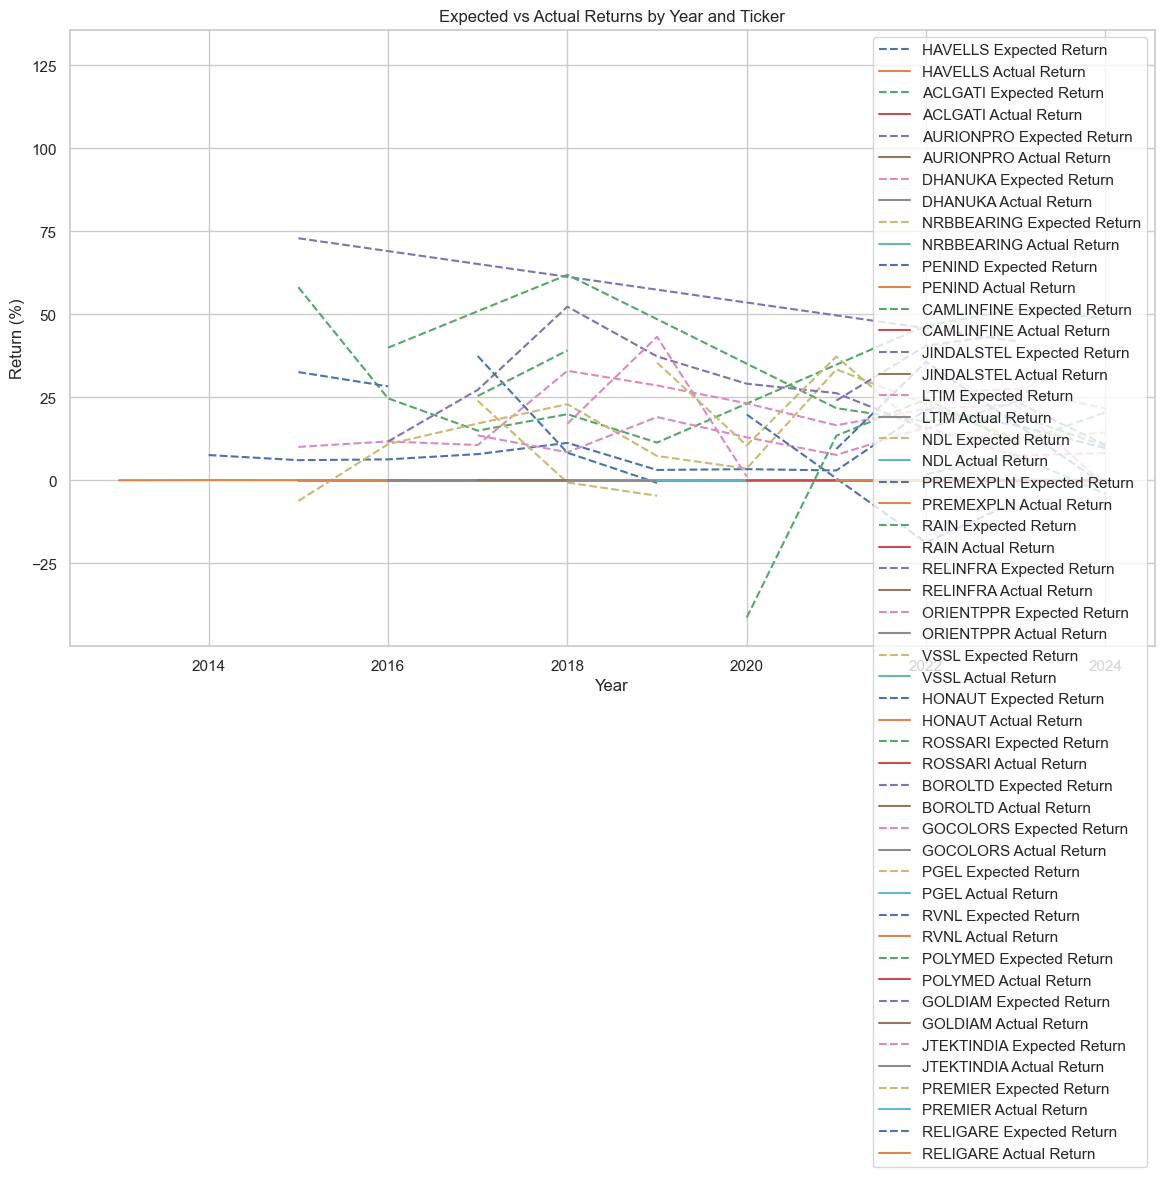

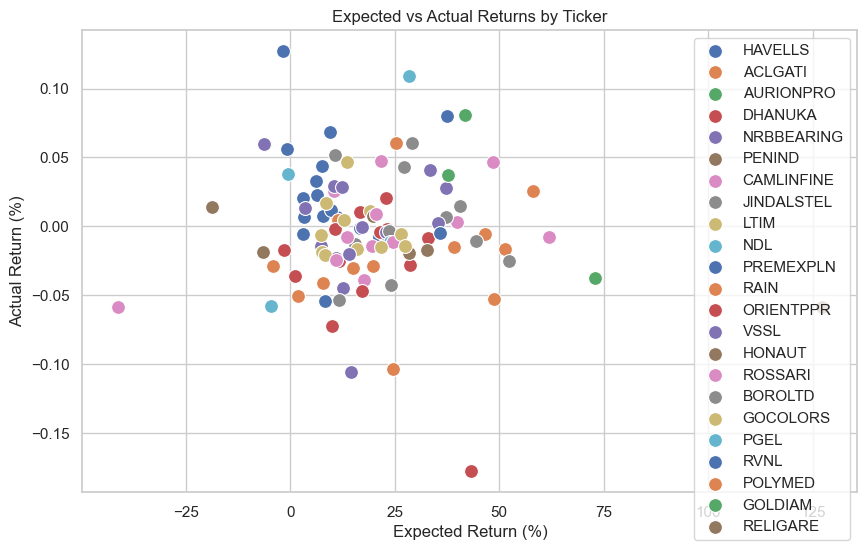

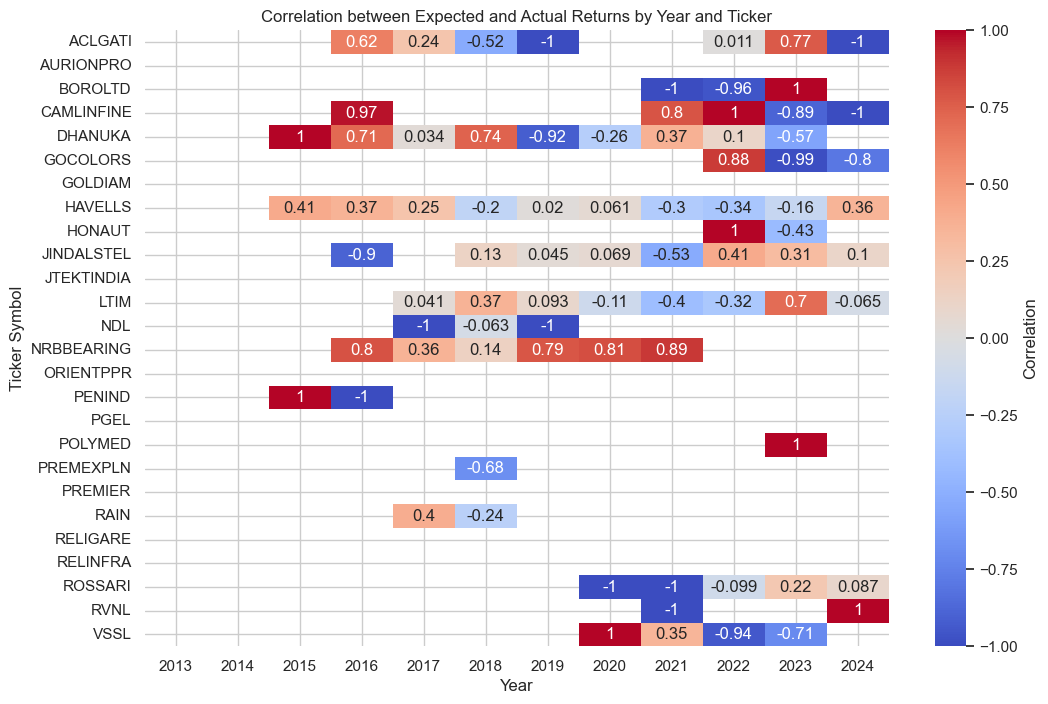

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract year from 'date' column
analyst_ratings['year'] = pd.to_datetime(analyst_ratings['date']).dt.year

# Step 2: Calculate correlation grouped by year and ticker
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

correlation_by_year_and_ticker = analyst_ratings.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')

# Step 3: Map the expected and actual returns
mapped_returns = analyst_ratings.groupby(['year', 'Symbol'])[['expected_return', 'actual_return']].mean().reset_index()

# Merge correlation results with mapped returns
merged_results = pd.merge(correlation_by_year_and_ticker, mapped_returns, on=['year', 'Symbol'])

# Step 4: Plotting
# Set up the plot environment
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot 1: Line plot of expected and actual returns for each year and ticker
for ticker in merged_results['Symbol'].unique():
    ticker_data = merged_results[merged_results['Symbol'] == ticker]
    
    plt.plot(ticker_data['year'], ticker_data['expected_return'], label=f'{ticker} Expected Return', linestyle='--')
    plt.plot(ticker_data['year'], ticker_data['actual_return'], label=f'{ticker} Actual Return', linestyle='-')

# Plot title and labels
plt.title("Expected vs Actual Returns by Year and Ticker")
plt.xlabel("Year")
plt.ylabel("Return (%)")
plt.legend(loc="upper right")
plt.grid(True)
# Save the plot to the device
plt.savefig('data/expected_vs_actual_returns_line_plot.png')
plt.show()

# Plot 2: Scatter plot of expected vs actual returns with correlation
plt.figure(figsize=(10, 6))
for ticker in merged_results['Symbol'].unique():
    ticker_data = merged_results[merged_results['Symbol'] == ticker]
    sns.scatterplot(data=ticker_data, x='expected_return', y='actual_return', label=ticker, s=100)

# Scatter plot title and labels
plt.title("Expected vs Actual Returns by Ticker")
plt.xlabel("Expected Return (%)")
plt.ylabel("Actual Return (%)")
plt.legend(loc="best")
plt.grid(True)
# Save the scatter plot
plt.savefig('data/expected_vs_actual_returns_scatter_plot.png')
plt.show()


# Plot 3: Heatmap of correlations by year and ticker
pivot_table = merged_results.pivot(index="Symbol", columns="year", values="correlation")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation'})
plt.title("Correlation between Expected and Actual Returns by Year and Ticker")
plt.xlabel("Year")
plt.ylabel("Ticker Symbol")
# Save the heatmap plot
plt.savefig('data/correlation_heatmap.png')
plt.show()

In [32]:
industry_keywords = {
    'Finance': ['bank', 'financial', 'insurance', 'capital', 'investment', 'wealth', 'lending', 'asset management', 'mutual fund', 'securities', 'credit', 'equity', 'stock exchange', 'private equity', 'venture capital'],
    
    'Technology': ['tech', 'software', 'IT', 'digital', 'cloud', 'data', 'artificial intelligence', 'AI', 'machine learning', 'hardware', 'blockchain', 'cybersecurity', 'semiconductor', 'saas', 'paas', 'technology services', 'internet', 'networking'],
    
    'Healthcare': ['pharma', 'biotech', 'medical', 'healthcare', 'hospital', 'clinical', 'diagnostics', 'life sciences', 'medtech', 'wellness', 'drug', 'therapy', 'genomics', 'vaccines', 'biopharma'],
    
    'Manufacturing': ['steel', 'cement', 'construction', 'engineering', 'manufacturing', 'machinery', 'industrial', 'fabrication', 'metals', 'automotive', 'tools', 'aerospace', 'assembly', 'chemicals', 'plastics', 'production'],
    
    'Energy': ['oil', 'energy', 'gas', 'power', 'coal', 'electricity', 'solar', 'renewable', 'wind', 'hydro', 'nuclear', 'fossil fuels', 'mining', 'petroleum', 'green energy', 'battery'],
    
    'Consumer Goods': ['consumer', 'retail', 'fashion', 'apparel', 'food', 'beverage', 'fmcg', 'personal care', 'household', 'luxury', 'ecommerce', 'cosmetics', 'home appliances', 'groceries', 'sportswear', 'furniture'],
    
    'Telecommunications': ['telecom', 'wireless', 'broadband', 'satellite', 'mobile', 'network', 'fiber', 'telecommunication services', 'cellular', '5G', 'communication', 'ISP'],
    
    'Utilities': ['water', 'electric', 'gas distribution', 'utilities', 'waste management', 'public services', 'sanitation', 'power grid'],
    
    'Real Estate': ['real estate', 'property', 'construction', 'housing', 'commercial real estate', 'residential', 'mortgage', 'land development', 'realty', 'leasing', 'brokerage', 'facility management', 'rental'],
    
    'Transportation': ['logistics', 'shipping', 'transportation', 'rail', 'trucking', 'freight', 'airlines', 'aviation', 'maritime', 'delivery', 'supply chain', 'public transport', 'cargo', 'transport services'],
    
    'Media & Entertainment': ['media', 'entertainment', 'film', 'television', 'music', 'broadcast', 'news', 'publishing', 'streaming', 'advertising', 'social media', 'gaming', 'content creation'],
    
    'Agriculture': ['agriculture', 'farming', 'crop', 'livestock', 'dairy', 'agribusiness', 'fertilizers', 'agrochemicals', 'forestry', 'horticulture', 'fisheries', 'seed', 'organic farming'],
    
    'Retail': ['retail', 'wholesale', 'department store', 'grocery', 'mall', 'shopping', 'online store', 'boutique', 'supermarket', 'convenience store']
}

In [53]:
# Groupby sector
# Initialize tqdm for pandas
tqdm.pandas()

# Function to identify sector based on description
def identify_sector(description):
    description = description.lower()  # Convert to lowercase for case-insensitive matching
    for sector, keywords in industry_keywords.items():
        if any(keyword in description for keyword in keywords):
            return sector
    return 'Unknown'  # Return 'Unknown' if no match is found

# Assuming stock_df contains the 'Description' column, apply with tqdm progress bar
stock_df['Sector'] = stock_df['Description'].progress_apply(identify_sector)

# Display the updated DataFrame with the sector column
print(stock_df[['Symbol', 'Company Name', 'Description', 'Sector']])


100%|█████████████████████████████████████████████████████████████████████| 6815041/6815041 [06:57<00:00, 16333.48it/s]


           Symbol                 Company Name  \
0        RELIANCE  Reliance Industries Limited   
1        RELIANCE  Reliance Industries Limited   
2        RELIANCE  Reliance Industries Limited   
3        RELIANCE  Reliance Industries Limited   
4        RELIANCE  Reliance Industries Limited   
...           ...                          ...   
6815036    ALLSEC  Allsec Technologies Limited   
6815037    ALLSEC  Allsec Technologies Limited   
6815038    ALLSEC  Allsec Technologies Limited   
6815039    ALLSEC  Allsec Technologies Limited   
6815040    ALLSEC  Allsec Technologies Limited   

                                               Description   Sector  
0        Reliance Industries Limited engages in hydroca...  Finance  
1        Reliance Industries Limited engages in hydroca...  Finance  
2        Reliance Industries Limited engages in hydroca...  Finance  
3        Reliance Industries Limited engages in hydroca...  Finance  
4        Reliance Industries Limited engages in h

In [47]:
analyst_ratings.columns

Index(['Unnamed: 0', 'date', 'stock_name', 'author', 'ltp', 'target',
       'price_at_reco', 'upside%', 'type', 'pdf_url', 'cleaned_price_at_reco',
       'percentage', 'expected_return', 'matched_company_name', 'Company Name',
       'Symbol', 'actual_return', 'year', 'Sector_x', 'Sector_y'],
      dtype='object')

In [48]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Description',
       'Symbol', 'Company Name', 'Sector'],
      dtype='object')

In [54]:
# Remove any duplicate sector columns by renaming or dropping them
# In this case, we'll keep only 'Sector_x' and rename it to 'Sector'
analyst_ratings['Sector'] = analyst_ratings['Sector_x'].combine_first(analyst_ratings['Sector_y'])

# Drop the duplicate sector columns after renaming
analyst_ratings.drop(columns=['Sector_x', 'Sector_y'], inplace=True)

# Display the updated DataFrame
print(analyst_ratings[['Symbol', 'Company Name', 'Sector', 'expected_return', 'actual_return']])


          Symbol             Company Name          Sector  expected_return  \
0        HAVELLS    havells india limited  Consumer Goods       -10.535481   
1        HAVELLS    havells india limited  Consumer Goods       -10.535481   
2        HAVELLS    havells india limited  Consumer Goods       -10.535481   
3        HAVELLS    havells india limited  Consumer Goods       -10.535481   
4        HAVELLS    havells india limited  Consumer Goods       -10.535481   
...          ...                      ...             ...              ...   
2898081     RAIN  rain industries limited   Manufacturing        21.821407   
2898082     RAIN  rain industries limited   Manufacturing        21.821407   
2898083     RAIN  rain industries limited   Manufacturing        21.821407   
2898084     RAIN  rain industries limited   Manufacturing        21.821407   
2898085     RAIN  rain industries limited   Manufacturing        21.821407   

         actual_return  
0            -0.011863  
1            

                   Sector                                       Company Name  \
0             Agriculture  Page Industries Limited, UPL Limited, Harrison...   
1          Consumer Goods  Hindustan Unilever Limited, Nestle India Limit...   
2                  Energy  NTPC Limited, Avenue Supermarts Limited, Adani...   
3                 Finance  Reliance Industries Limited, Tata Consultancy ...   
4              Healthcare  Sun Pharmaceutical Industries Limited, Adani P...   
5           Manufacturing  Asian Paints Limited, JSW Steel Limited, Tata ...   
6   Media & Entertainment  Jindal Poly Films Limited, Malu Paper Mills Li...   
7             Real Estate  Lemon Tree Hotels Limited, Hemisphere Properti...   
8                  Retail                        Indiamart Intermesh Limited   
9              Technology  Bharti Airtel Limited, Tata Motors Limited, Ul...   
10     Telecommunications  Bajaj Auto Limited, MRF Limited, Blue Dart Exp...   
11         Transportation  InterGlobe Av

C:\Users\disch\AppData\Local\Temp\ipykernel_5708\4105866858.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_group_details, x='Sector', y='Company Count', palette='viridis')


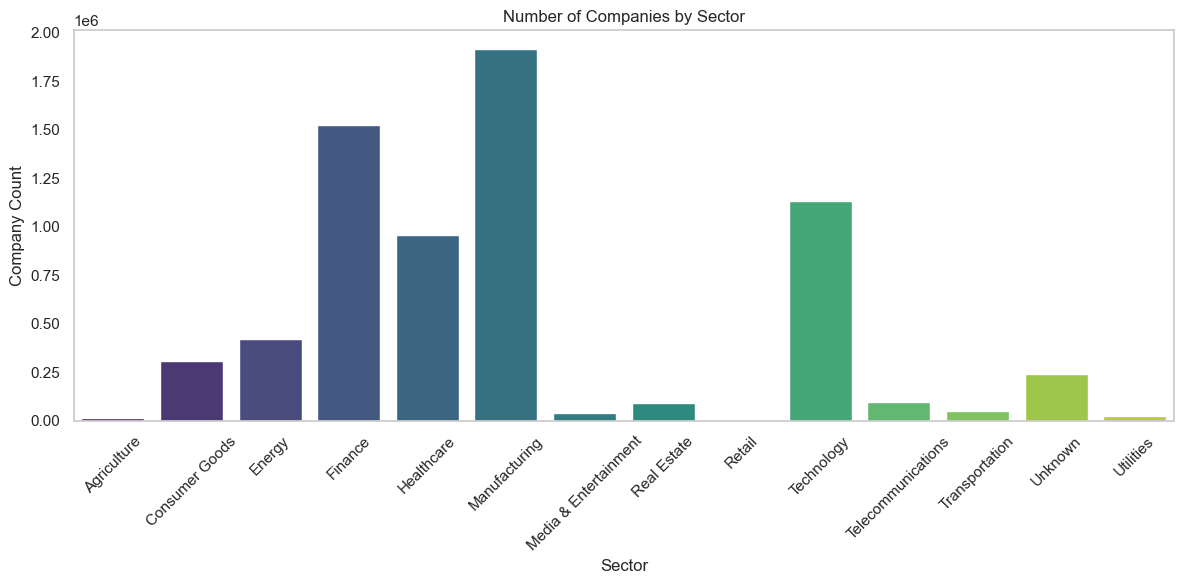

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Sector' and aggregate company names
sector_group_details = stock_df.groupby('Sector').agg({
    'Company Name': lambda x: ', '.join(x.unique()),  # Combine company names
    'Symbol': 'count'  # Count the number of companies in each sector
}).reset_index()

# Rename the 'Symbol' column to 'Company Count' for clarity
sector_group_details.rename(columns={'Symbol': 'Company Count'}, inplace=True)

# Display the sector details
print(sector_group_details)

# Plotting the information
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_group_details, x='Sector', y='Company Count', palette='viridis')

# Adding titles and labels
plt.title('Number of Companies by Sector')
plt.xlabel('Sector')
plt.ylabel('Company Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout
plt.show()


               Sector                                       Company Name  \
0      Consumer Goods  havells india limited, go fashion (india) limited   
1              Energy                         premier explosives limited   
2             Finance  religare enterprises limited, ltimindtree limi...   
3          Healthcare  poly medicure limited, allcargo gati limited, ...   
4       Manufacturing  vardhman special steels limited, orient paper ...   
5          Technology  honeywell automation india limited, pennar ind...   
6  Telecommunications                               nandan denim limited   

   Company Count  
0        1182050  
1          11988  
2         336733  
3         142890  
4         845032  
5         315236  
6          64134  


C:\Users\disch\AppData\Local\Temp\ipykernel_5708\418364064.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_group_details, x='Sector', y='Company Count', palette='viridis')


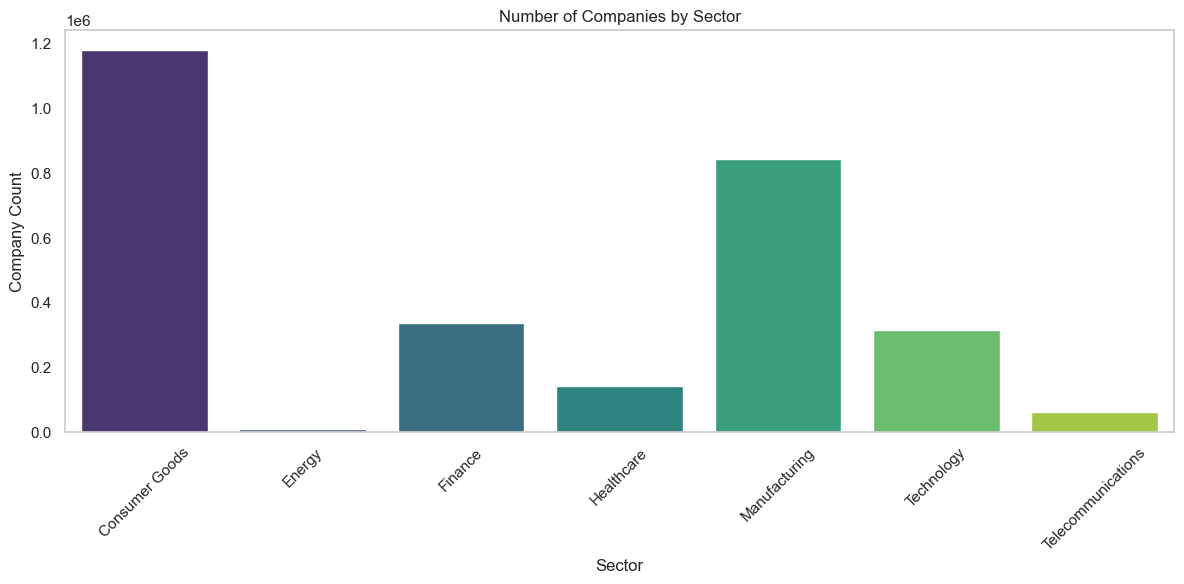

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Sector' and aggregate company names
sector_group_details = analyst_ratings.groupby('Sector').agg({
    'Company Name': lambda x: ', '.join(x.unique()),  # Combine company names
    'Symbol': 'count'  # Count the number of companies in each sector
}).reset_index()

# Rename the 'Symbol' column to 'Company Count' for clarity
sector_group_details.rename(columns={'Symbol': 'Company Count'}, inplace=True)

# Display the sector details
print(sector_group_details)

# Plotting the information
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_group_details, x='Sector', y='Company Count', palette='viridis')

# Adding titles and labels
plt.title('Number of Companies by Sector')
plt.xlabel('Sector')
plt.ylabel('Company Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout
plt.show()


In [55]:
import pandas as pd

# Step 1: Calculate correlation grouped by sector
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by sector and calculate the correlation for each sector
correlation_by_sector = analyst_ratings.groupby('Sector').apply(calculate_correlation).reset_index(name='correlation')

# Display the correlation by sector
print("Correlation between expected and actual returns by sector:")
print(correlation_by_sector)

Correlation between expected and actual returns by sector:
               Sector  correlation
0      Consumer Goods    -0.063328
1              Energy     0.141444
2             Finance    -0.132981
3          Healthcare     0.333956
4       Manufacturing     0.011278
5          Technology     0.060142
6  Telecommunications    -0.054823


C:\Users\disch\AppData\Local\Temp\ipykernel_5708\2549811027.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_sector = analyst_ratings.groupby('Sector').apply(calculate_correlation).reset_index(name='correlation')


In [76]:
print(analyst_ratings)

         Unnamed: 0       date           stock_name  \
0             45319 2024-07-29    havells-india-ltd   
1             45319 2024-07-29    havells-india-ltd   
2             45319 2024-07-29    havells-india-ltd   
3             45319 2024-07-29    havells-india-ltd   
4             45319 2024-07-29    havells-india-ltd   
...             ...        ...                  ...   
2898081       46076 2017-02-27  rain-industries-ltd   
2898082       46076 2017-02-27  rain-industries-ltd   
2898083       46076 2017-02-27  rain-industries-ltd   
2898084       46076 2017-02-27  rain-industries-ltd   
2898085       46076 2017-02-27  rain-industries-ltd   

                                    author      ltp  target     price_at_reco  \
0        Geojit BNP Paribas\nReco   Target  1988.05  1644.0  1837.60\n(8.19%)   
1        Geojit BNP Paribas\nReco   Target  1988.05  1644.0  1837.60\n(8.19%)   
2        Geojit BNP Paribas\nReco   Target  1988.05  1644.0  1837.60\n(8.19%)   
3        Geojit

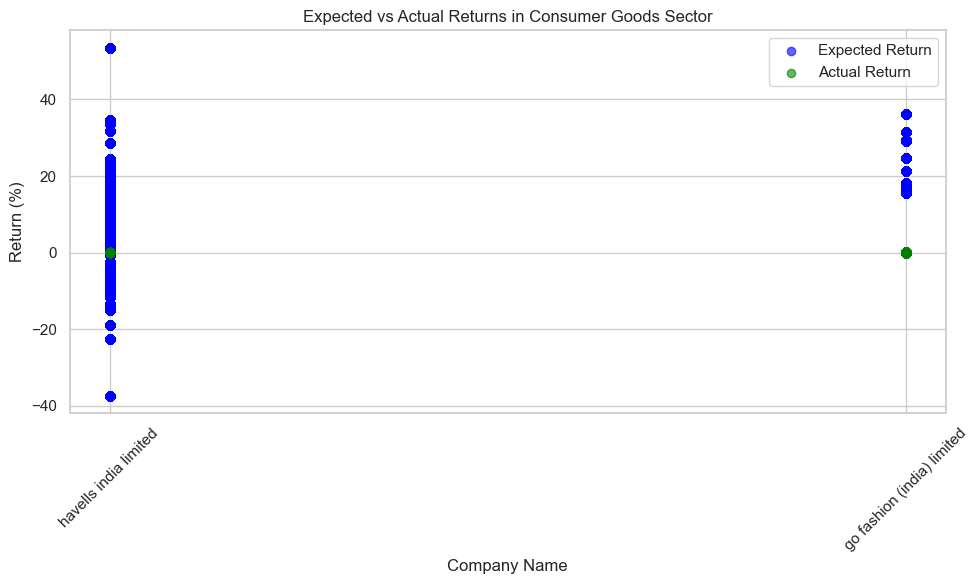

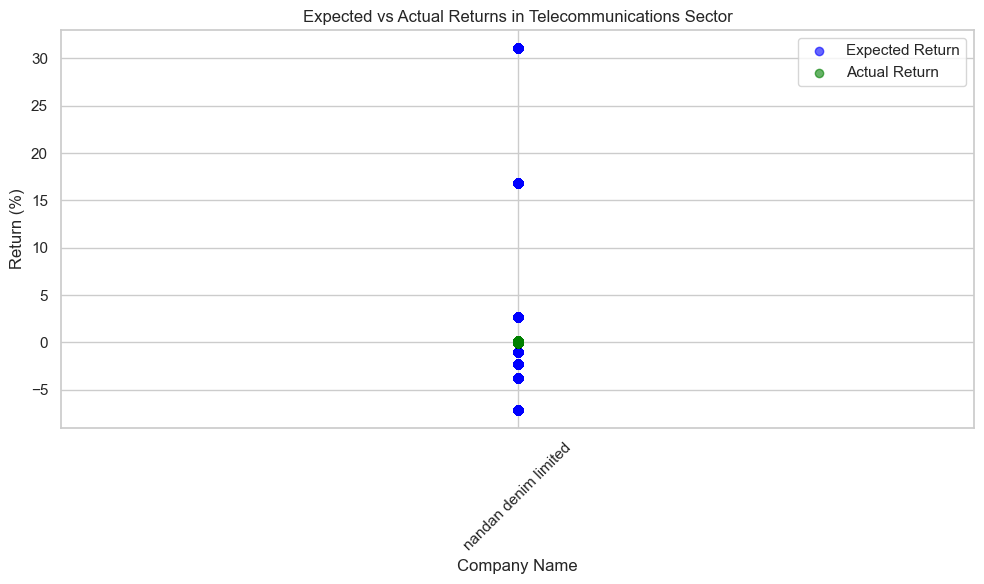

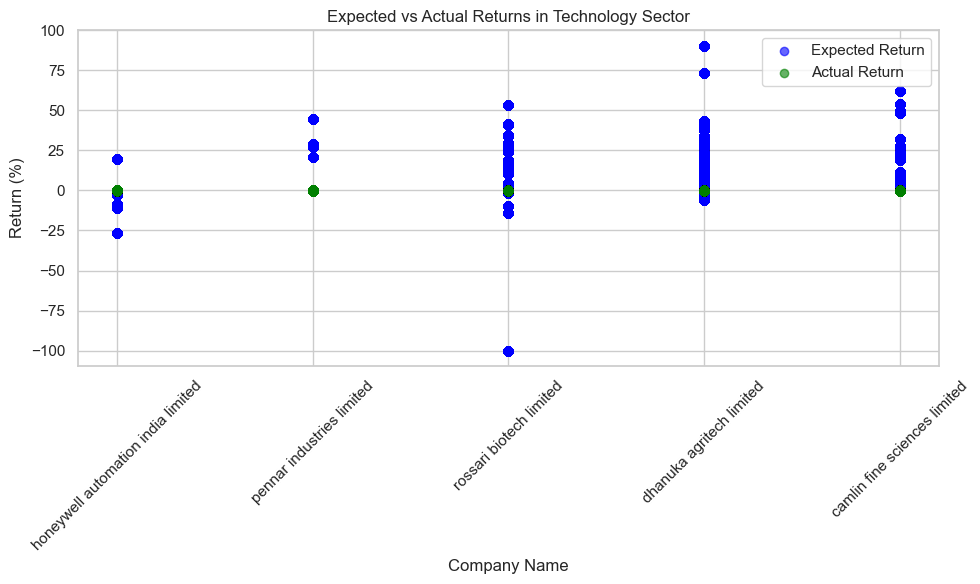

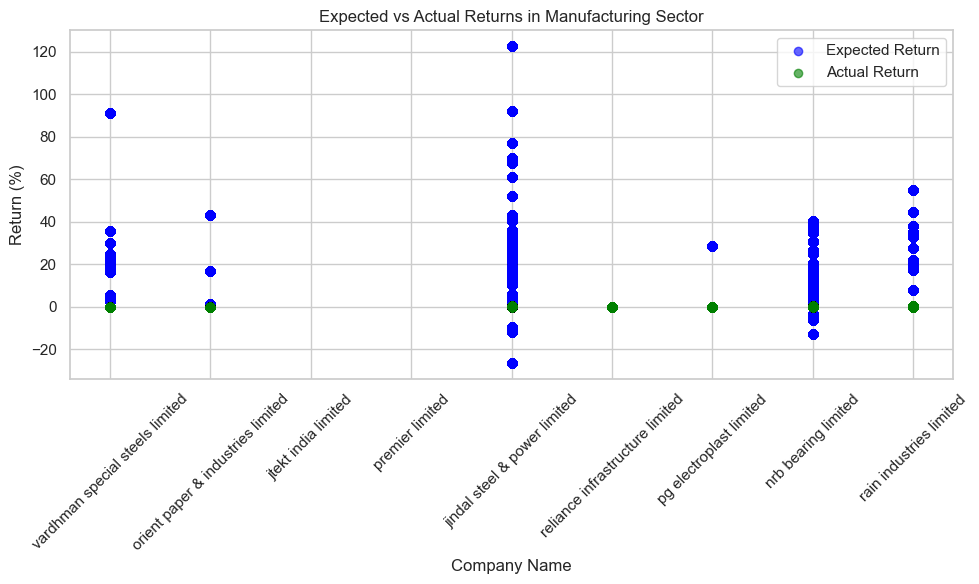

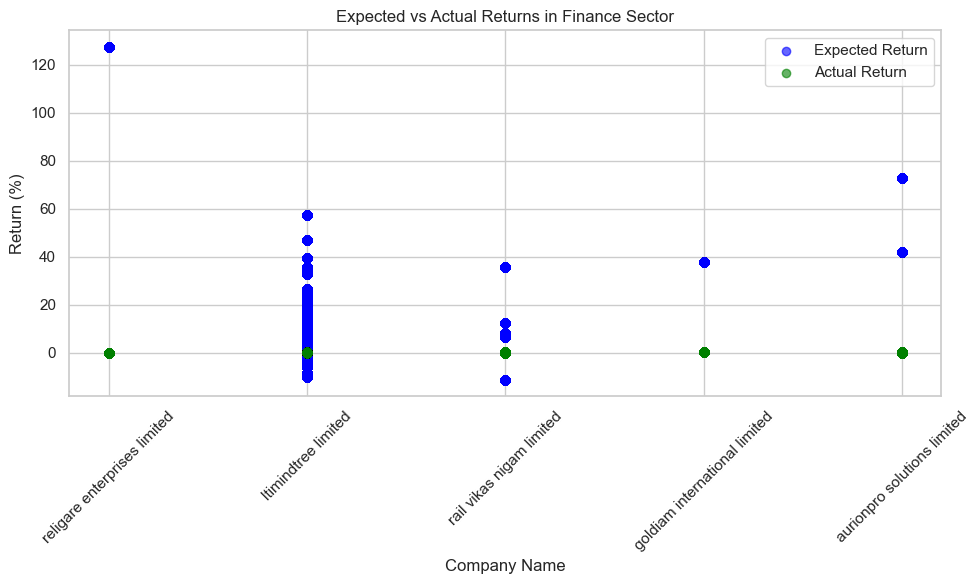

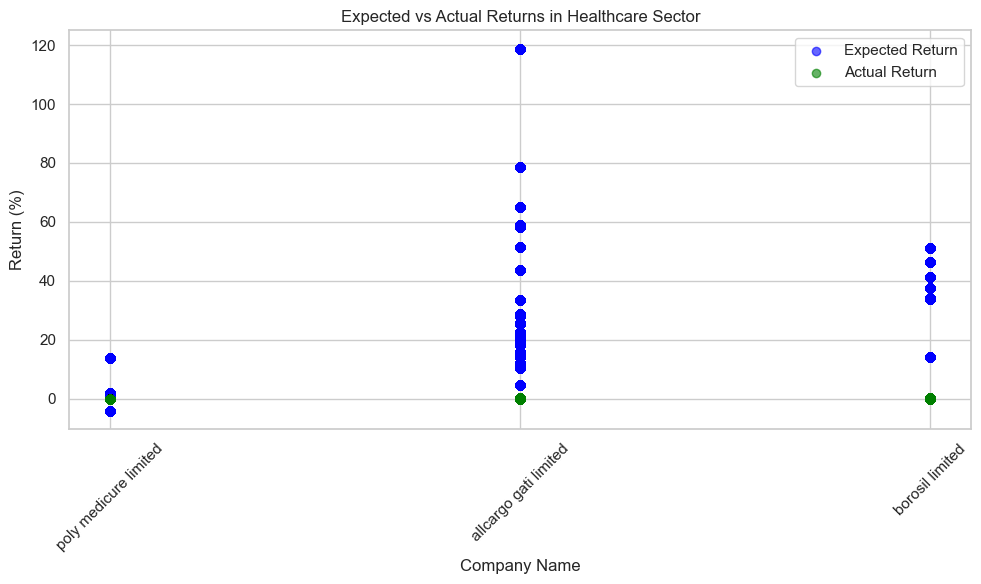

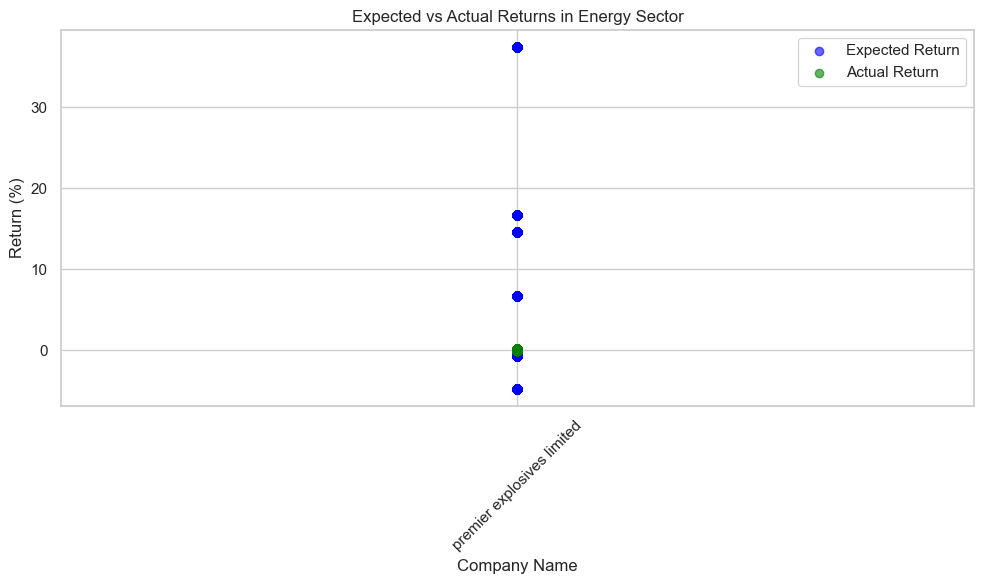

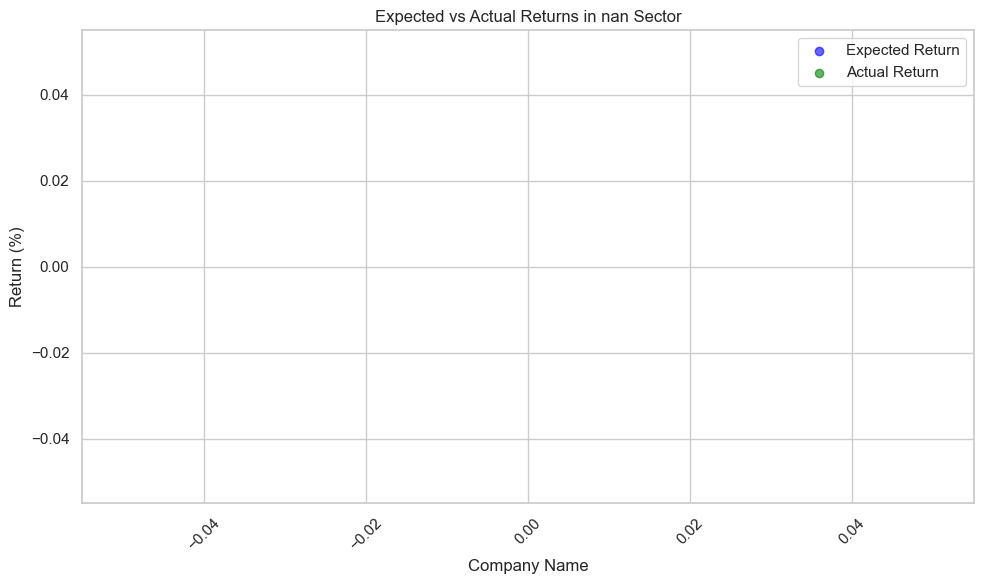

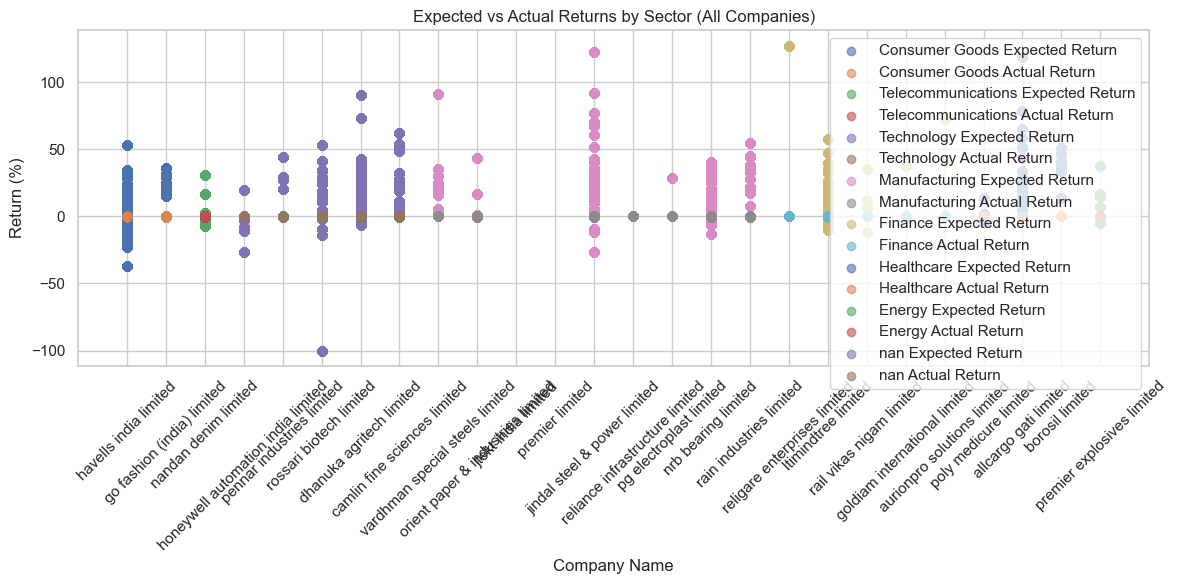

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a function to plot individual data for each sector
def plot_sector_returns(sector_name, sector_data):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for expected and actual returns
    plt.scatter(sector_data['Company Name'], sector_data['expected_return'], 
                label='Expected Return', marker='o', color='blue', alpha=0.6)
    plt.scatter(sector_data['Company Name'], sector_data['actual_return'], 
                label='Actual Return', marker='o', color='green', alpha=0.6)

    # Plot title and labels
    plt.title(f"Expected vs Actual Returns in {sector_name} Sector")
    plt.xlabel("Company Name")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 2: Plot for each sector individually
unique_sectors = analyst_ratings['Sector'].unique()

for sector in unique_sectors:
    sector_data = analyst_ratings[analyst_ratings['Sector'] == sector]
    plot_sector_returns(sector, sector_data)

# Step 3: Combined plot for all sectors
plt.figure(figsize=(12, 6))

for sector in unique_sectors:
    sector_data = analyst_ratings[analyst_ratings['Sector'] == sector]
    plt.scatter(sector_data['Company Name'], sector_data['expected_return'], 
                label=f'{sector} Expected Return', alpha=0.6)
    plt.scatter(sector_data['Company Name'], sector_data['actual_return'], 
                label=f'{sector} Actual Return', alpha=0.6)

# Plot title and labels for combined plot
plt.title("Expected vs Actual Returns by Sector (All Companies)")
plt.xlabel("Company Name")
plt.ylabel("Return (%)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
# Step 1: Filter for Consumer Goods sector
consumer_goods_companies = analyst_ratings[analyst_ratings['Sector'] == 'Consumer Goods']

# Step 2: Get unique companies
unique_companies = consumer_goods_companies['Company Name'].unique()

# Step 3: Display the unique companies
print("Unique companies in Consumer Goods sector:")
print(unique_companies)

Unique companies in Consumer Goods sector:
['havells india limited' 'go fashion (india) limited']


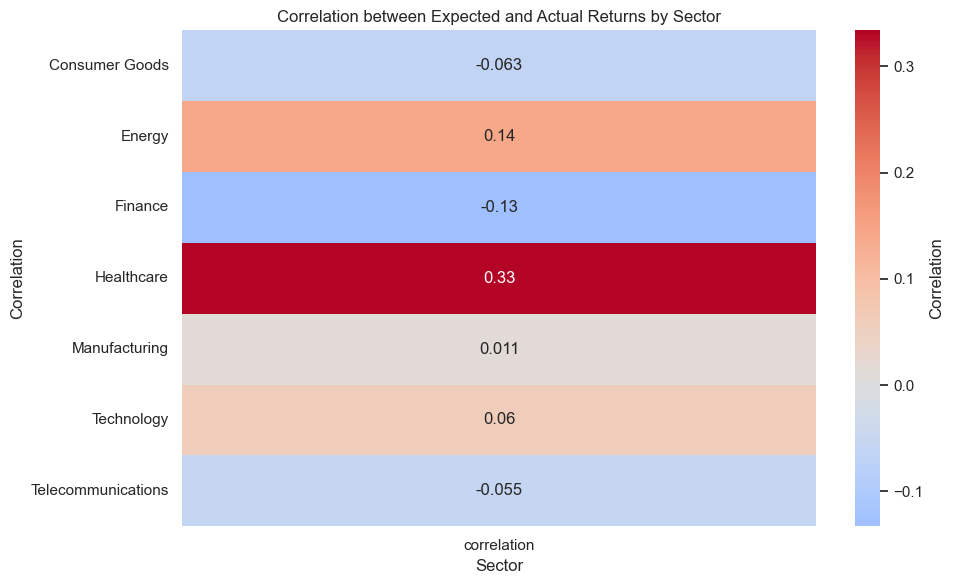

In [71]:
# Plot 2: Heatmap of correlations by sector
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_by_sector.set_index('Sector'), annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation'})
plt.title("Correlation between Expected and Actual Returns by Sector")
plt.xlabel("Sector")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()
